## Проект: "Какой тариф лучше?"

##### Описание данных

* Таблица users (информация о пользователях):
<br> user_id — уникальный идентификатор пользователя
<br> first_name — имя пользователя
<br> last_name — фамилия пользователя
<br> age — возраст пользователя (годы)
<br> reg_date — дата подключения тарифа (день, месяц, год)
<br> churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
<br> city — город проживания пользователя
<br> tariff — название тарифного плана

* Таблица calls (информация о звонках):
<br> id — уникальный номер звонка
<br> call_date — дата звонка
<br> duration — длительность звонка в минутах
<br> user_id — идентификатор пользователя, сделавшего звонок

* Таблица messages (информация о сообщениях):
<br> id — уникальный номер сообщения
<br> message_date — дата сообщения
<br> user_id — идентификатор пользователя, отправившего сообщение

* Таблица internet (информация об интернет-сессиях):
<br> id — уникальный номер сессии
<br> mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
<br> session_date — дата интернет-сессии
<br> user_id — идентификатор пользователя

* Таблица tariffs (информация о тарифах):
<br> tariff_name — название тарифа
<br> rub_monthly_fee — ежемесячная абонентская плата в рублях
<br> minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
<br> messages_included — количество сообщений в месяц, включённых в абонентскую плату
<br> mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
<br> rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
<br> rub_per_message — стоимость отправки сообщения сверх тарифного пакета
<br> rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


# Изучим информацию

In [1]:
# загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
users = pd.read_csv('/datasets/users.csv')
print(users.info())
print('-----------------')
print(users.city.unique())
print('-----------------')
print(users.duplicated().sum())
print('-----------------')
print(users.churn_date.unique())
print('-----------------')
users.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
-----------------
['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
344,1344,60,NaN,Воронеж,Илзе,Игнатьева,2018-04-03,ultra
443,1443,21,NaN,Казань,Иван,Афинин,2018-09-17,smart
287,1287,39,NaN,Севастополь,Вениамин,Мишин,2018-09-23,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
362,1362,47,NaN,Владимир,Нина,Колесова,2018-08-02,smart


##### Комментарий к таблице users
Пропущенные значения в столбце churn_rate означают что клиент действующий, и связанны скорее всего с особенностями выгрузки.
Столбцы reg_date и churn_date следует привести к типу datetime

In [3]:
internet = pd.read_csv('/datasets/internet.csv')

internet.info()
print('-----------------')
print(internet.mb_used.describe())
print('-----------------')
print(internet.duplicated().sum())
internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
-----------------
count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64
-----------------
0


,id,mb_used,session_date,user_id
65732,1224_378,394.43,2018-04-30,1224
62352,1211_185,375.21,2018-12-05,1211
36781,1127_131,6.05,2018-07-02,1127
6920,1023_156,266.48,2018-11-30,1023
116896,1393_382,0.00,2018-05-22,1393


##### Комментарий к таблице internet
Столбец session_date следует привести к типу datetime.
Сессии с 0 мб скорее всего потребуется округлить до 1 мб, остальные значения округлить вверх, преобразовав столбец в int.

In [4]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()
print('-----------------')
print(messages.duplicated().sum())
messages.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
-----------------
0


,id,message_date,user_id
65922,1282_354,2018-09-09,1282
85954,1356_971,2018-09-05,1356
23682,1098_1,2018-08-04,1098
46817,1203_202,2018-06-26,1203
8355,1033_106,2018-08-12,1033


##### Комментарий к таблице messages

Столбец message_date следует привести к типу datetime

In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()
print('----------------')
print(calls.duration.describe())
print('-----------------')
print(calls.duplicated().sum())
calls.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
----------------
count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64
-----------------
0


,id,call_date,duration,user_id
71443,1178_203,2018-08-10,21.34,1178
45160,1113_576,2018-05-07,0.10,1113
115350,1296_163,2018-06-30,13.41,1296
186139,1460_57,2018-06-21,0.37,1460
137378,1352_102,2018-05-30,4.85,1352


##### Комментарий к таблице calls

Столбец call_date следует привести к типу datetime. Звонки длиной 0 округлить до минуты, преобразовав столбец в int с округлением вверх.

### Вывод
В целом, на первый взгляд, с данными нет особых проблем. В рамхах предоброботки данных нужно будет:
1. Преобразовать столбцы к нужному типу
2. Округлить использование минут и Мб
3. Заполнять столбец churn мы не будем, так как это не пропущенные данные.


# Подготовка данных

In [7]:
# преобразуем данные в таблце internet:
# округлим данные в столбце mb_used вверх, заменим 0 на 1, столбец сделаем int
# сгруппируем данные по месяцам и по user_id, для этого сделаем столбец session_date формата datetime
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype(int)
internet['mb_used'] = internet['mb_used'].replace(0,1)
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month
internet.drop(columns = ['session_date','id'], inplace = True)

In [8]:
grouped_internet = internet.pivot_table(index = ['user_id','month'], aggfunc= {'mb_used':'sum'})
grouped_internet

mb_used
user_id month         
1000    5         2257
        6        23262
        7        14017
        8        14072
        9        14583
...                ...
1498    10       20614
1499    9         1849
        10       17824
        11       17994
        12       13082

[3203 rows x 1 columns]

In [9]:
# проделаем похожие действия для таблицы messages
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month
messages.drop(columns = ['message_date'], inplace = True)

In [10]:
grouped_messages = messages.pivot_table(index = ['user_id','month'], aggfunc= {'id':'count'}).rename(columns = {'id':'msg_quantity'})
grouped_messages

msg_quantity
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
...                     ...
1498    10               42
1499    9                11
        10               48
        11               59
        12               66

[2717 rows x 1 columns]

In [11]:
# и аналогичные действи выполним с таблицей calls

calls['duration'] = calls['duration'].apply(np.ceil).astype(int)
calls['duration'] = calls['duration'].replace(0,1)
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month
calls.drop(columns = ['call_date','id'], inplace = True)

In [12]:
grouped_calls = calls.pivot_table(index = ['user_id','month'], aggfunc= {'duration':'sum'})

In [13]:
#вот и пришло время для финальной мастер таблицы:

joined_df = grouped_calls.join(grouped_messages,how = 'outer')
joined_df = joined_df.join(grouped_internet,how = 'outer')
joined_df

duration  msg_quantity  mb_used
user_id month                                 
1000    5         164.0          22.0   2257.0
        6         187.0          60.0  23262.0
        7         346.0          75.0  14017.0
        8         418.0          81.0  14072.0
        9         478.0          57.0  14583.0
...                 ...           ...      ...
1498    10        258.0          42.0  20614.0
1499    9          71.0          11.0   1849.0
        10        473.0          48.0  17824.0
        11        624.0          59.0  17994.0
        12        505.0          66.0  13082.0

[3214 rows x 3 columns]

In [14]:
# сбросим двойной индекс из месяца и id пользователя
joined_df = joined_df.reset_index()

#с учётом того, что получившиеся NaNы - реальный результат отсутствия услуг,можно заменить их на 0.
joined_df = joined_df.fillna(0)

In [15]:
# в нашй табличке не хватает данных о тарифе. Сделаем индекс = user_id 
# для простого копирования столбца из одной таблицы в другую
joined_df.set_index('user_id',inplace = True)
users.set_index('user_id',inplace = True)
joined_df['tariff'] = users['tariff']
joined_df.head(5)

,month,duration,msg_quantity,mb_used,tariff
user_id,,,,,
1000,5,164.0,22.0,2257.0,ultra
1000,6,187.0,60.0,23262.0,ultra
1000,7,346.0,75.0,14017.0,ultra
1000,8,418.0,81.0,14072.0,ultra
1000,9,478.0,57.0,14583.0,ultra


In [16]:
# рассчитаем теперь помесячную выручку для каждого пользователя
# для этого создадим функцию revenue_counter

def revenue_counter(row):
    revenue = 0
    if row['tariff'] == 'ultra':
        if row['duration'] > 3000:
            revenue += (row['duration'] - 3000)*1
        if row['msg_quantity'] > 1000:
            revenue += (row['msg_quantity'] - 1000)*1
        if row['mb_used'] > 30720:
            revenue += (row['mb_used'] - 30720)/1024*150
        revenue += 1950
    if row['tariff'] == 'smart':
        if row['duration'] > 500:
            revenue += (row['duration'] - 500)*3
        if row['msg_quantity'] > 50:
            revenue += (row['msg_quantity'] - 50)*3
        if row['mb_used'] > 15360:
            revenue += (row['mb_used'] - 15360)/1024*200
        revenue += 550
    return revenue



joined_df['revenue'] = joined_df.apply(revenue_counter, axis = 1)    

In [17]:
# преобразуем DF в нужные нам типы
convert_dict = {'duration':int,
                'msg_quantity':int,
                'mb_used':int,
                'revenue':int
               }
joined_df = joined_df.astype(convert_dict)
joined_df.head()

,month,duration,msg_quantity,mb_used,tariff,revenue
user_id,,,,,,
1000,5,164,22,2257,ultra,1950
1000,6,187,60,23262,ultra,1950
1000,7,346,75,14017,ultra,1950
1000,8,418,81,14072,ultra,1950
1000,9,478,57,14583,ultra,1950


# Анализ данных

In [18]:
# посмотрим на основные статистики сформированной таблицы
joined_df.describe().astype(int).drop(columns = 'month')

,duration,msg_quantity,mb_used,revenue
count,3214,3214,3214,3214
mean,463,38,17233,1499
std,247,36,7579,786
min,0,0,0,550
25%,291,9,12507,713
50%,456,30,16969,1591
75%,605,57,21453,1950
max,1727,224,49793,6768


In [19]:
# посмотрим на медианные значения длительности вызовов, использования трафика и отправленных СМС в разрезе тарифов
joined_df.pivot_table(index = 'tariff',aggfunc = {
                                                'duration': 'median',
                                                'mb_used':'median',
                                                'msg_quantity':'median'   
                                                  })

,duration,mb_used,msg_quantity
tariff,,,
smart,435,16540,28
ultra,532,19324,38


In [20]:
# добавим дисперсию и стандартное отклонение
joined_df.groupby('tariff').aggregate(['var','mean','std','median']).drop(columns=['month']).astype(int)

duration                  msg_quantity                    mb_used  \
            var mean  std median          var mean std median        var   
tariff                                                                     
smart     37974  429  194    435          796   33  28     28   34571991   
ultra    106105  540  325    532         2285   49  47     38  101951580   

                            revenue                    
         mean    std median     var  mean  std median  
tariff                                                 
smart   16237   5879  16540  636094  1251  797    987  
ultra   19488  10097  19324  126941  2060  356   1950

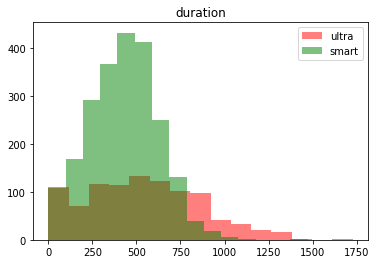

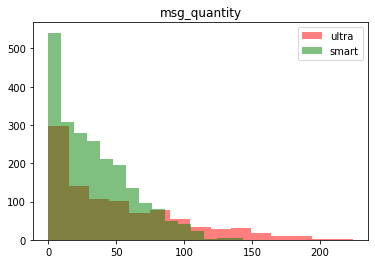

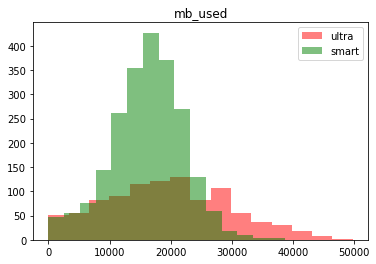

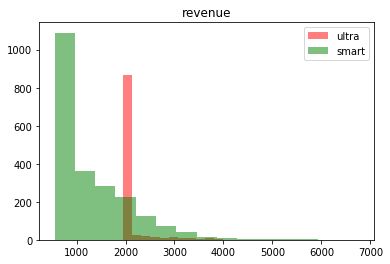

In [21]:
# посмотрим на картинки
def hist_drawer(df, columns):
    for column in columns:
        plt.hist(df.query('tariff == "ultra"')[column],alpha=0.5,bins=15,color = 'r', label = 'ultra')
        plt.hist(df.query('tariff == "smart"')[column],alpha=0.5,bins=15,color = 'g', label = 'smart')
        plt.legend(loc='best')
        plt.title(column)
        plt.show()

columns= ['duration','msg_quantity','mb_used','revenue']        
hist_drawer(joined_df, columns) 

#### Вывод по разделу
Пользователи тарифа smart пользуются услугами оператора меньше, так медианная продолжительность разговоров составляет 82% от тарифа ultra, медианный расход Мб  86%, а СМС 74%.
Стандартное отклонение  услуг тарифа смарт ниже, чем тарифа ультра, в то же время по выручке СО тарифа ультра ниже, чем тарифа смарт, что может говорить о том, что пользователи тарифа смарт в целом более одинаково потребляют услуги, но из-за низкого порога включенных в тариф "бесплатных" услуг, приходится значительно доплачивать.
<br> Что касается графиков, то заметно что пользователи тарифа смарт пользуются услугами в целом меньше, чем тарифа ультра, но среди пользователей тарифа смарт не мало тех кто платит за услуги больше пользователей ультры.
В целом, графики показывают то, о чем ранее сказало нам стандартное отклонение.
<br> Графики mb_user и duration имеют нормальное распределение, а revenue и msg_quantity Пуассоновское.


# Проверка гипотез
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

In [25]:
# проверим скучную гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая = H0
# уровень существенности установим на уровне 5%
# для проверки гипотезы о равенстве средних двух генеральных совокупностей есть волшебный метод scipy.stats.ttest_ind()

ultra_sample = joined_df.query('tariff=="ultra"')['revenue']
smart_sample = joined_df.query('tariff=="smart"')['revenue']
alpha = .05
result = st.ttest_ind(ultra_sample, smart_sample)
print('p-value получился:',result.pvalue)
if  result.pvalue < alpha:
    print('отлоняем нулевую гипотезу, т.е. выборки не равны')
else:
    print('средние выручки пользователей тарифа ультра и смарт схожи')

p-value получился: 5.640460486787866e-180
отлоняем нулевую гипотезу, т.е. выборки не равны


Получается что средние чеки пользователей тарифов не равны, и это различие значительно. Но подтверждение этому мы видели и ранее. Косвенно - абоненская плата тарифа Ультра почти в 4 раза выше чем на тарифе Смарт. Ранее полученные статистики (медиана и среднее) подтверждают бОльшую выручку по тарифу ультра:
 

In [27]:
joined_df.groupby('tariff').aggregate(['mean','median']).drop(columns=['month','duration', 'msg_quantity', 'mb_used']).astype(int)

revenue       
          mean median
tariff               
smart     1251    987
ultra     2060   1950

In [23]:
# для проверки очередной гипотезы в наши данные следует добавить информацию о городе пользователя
joined_df['city'] = users['city']

In [24]:
# теперь проверим скучную гипотезу о том, что средняя выручка пользователей в МСК равна средней выручке пользователей регионов
# уровень существенности установим на уровне 5%
msk_sample = joined_df.query('city=="Москва"')['revenue']
region_sample = joined_df.query('city!="Москва"')['revenue']
alpha = .05
result = st.ttest_ind(msk_sample, region_sample)
print('p-value получился:',result.pvalue)
if  result.pvalue < alpha:
    print('отлоняем нулевую гипотезу, т.е. выборки не равны')
else:
    print('средние выручка пользователей Москвы и регионов схожи')


p-value получился: 0.5217297322078767
средние выручка пользователей Москвы и регионов схожи


В схожести выручки по МСК и регионам на самом деле нет ничего удивительного, так как абонентская плата не отличается в зависимости от региона, одинакова плата и за дополнительные услуги. Косвенно через выручку можно предположить, что объём потребляемых услуг сверх включенных в абоненскую плату тоже схож.

# Общий вывод
* Данные хорошего качества - не было выявлено ошибочных пропусков и прочего;
* Что касается ответа на вопрос  - какой тариф выгоднее - то на него ответить исходя из имеющихся данных невозможно без понимания издержек оператора - отличаются ли они от региона, себестоимость единицы минуты разговора или Мб для оператора и прочее.
* В то же время, исходя из имеющихся даннфх можно сделать следующие выводы:
<br> - Пользователи тарифа smart пользуются услугами оператора меньше, так медианная продолжительность разговоров составляет 82% от тарифа ultra, медианный расход Мб  86%, а СМС 74%.
<br> - Пользователи тарифа смарт пользуются услугами в целом меньше, чем тарифа ультра, но среди пользователей тарифа смарт не мало тех кто платит за услуги больше пользователей ультры.
* При проверке гипотез мы пришли к следующим выводам:
<br> - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается - в принципе подтверждение этоу мы видел на графиках.
<br> - средние выручки пользователей Москвы и регионов схожи - в этом нет ничего удевительного, так как тарифы на услуги для всех регионов одинаковые.


##### Таким образом, косвенно можно сделать вывод, что тариф смарт для оператора выгоднее, так как в среднем расход услуг на этом тарифе ниже, чем на тарифе ультра, но выручка в некоторых случаях выше.
##### Также тариф Ультра приносит оператору больше денег и этот факт не зависит от региона абонента.